In [18]:
import pickle
import pandas as pd
import numpy
import re
import os
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

In [2]:
train= pd.read_csv('train.csv')

In [19]:
train= pd.read_csv('another.csv')

In [33]:
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content_train = []
j=0
for em in train['id'].values:    
    all_content_train.append(LabeledSentence1(em,[j]))
    j+=1
print("Linhas do BD contempladas: ", j)

Linhas do BD contempladas:  1000


In [34]:
d2v_model = Doc2Vec(all_content_train, vector_size = 100, window = 10, min_count = 5, workers=7, dm = 1,alpha=0.025, min_alpha=0.001)

d2v_model.train(all_content_train, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

TypeError: object of type 'numpy.int64' has no len()

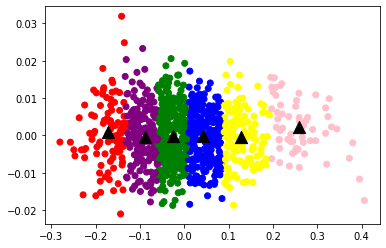

In [38]:
kmeans_model = KMeans(n_clusters=6, init='k-means++', max_iter=200) 
X = kmeans_model.fit(d2v_model.dv.vectors)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(d2v_model.dv.vectors)
pca = PCA(n_components=2).fit(d2v_model.dv.vectors)
datapoint = pca.transform(d2v_model.dv.vectors)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure


label1 = ["yellow", "green", "red", "blue", "pink","purple"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='black')
plt.show()